In [1]:
# 安裝必要的套件
!pip install pycaret pandas numpy matplotlib

# 下載Titanic資料集
!wget -O train.csv https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv
!wget -O test.csv https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv

# 載入資料與必要的套件
import pandas as pd
from pycaret.classification import *

# 讀取資料
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 查看訓練資料集的前幾行
print("Train Dataset:")
print(train.head())

# 簡單處理缺失值與特徵工程
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

# 處理測試集缺失值
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# 建立新特徵
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)
# 刪除無用欄位
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 將類別變數轉換為類別型
train['Sex'] = train['Sex'].astype('category')
train['Embarked'] = train['Embarked'].astype('category')
test['Sex'] = test['Sex'].astype('category')
test['Embarked'] = test['Embarked'].astype('category')

# 設定 PyCaret 環境
clf = setup(data=train,
            target='Survived',
            categorical_features=['Sex', 'Embarked'],
            session_id=123)

# 比較所有模型
best_model = compare_models(n_select=16)  # 比較 16 種模型


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.8 MB/s eta 0:00:00
   ━━━

--2024-11-27 10:07:45--  https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in 0.008s  

2024-11-27 10:07:46 (7.24 MB/s) - ‘train.csv’ saved [61194/61194]

--2024-11-27 10:07:46--  https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28629 (28K) [text/plain]
Saving to: ‘t

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 11)"
4,Transformed data shape,"(891, 13)"
5,Transformed train set shape,"(623, 13)"
6,Transformed test set shape,"(268, 13)"
7,Numeric features,8
8,Categorical features,2
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8153,0.8413,0.7239,0.7807,0.7499,0.6041,0.6063,0.3570
gbc,Gradient Boosting Classifier,0.8105,0.8370,0.6986,0.7846,0.7362,0.5897,0.5943,0.1800
ada,Ada Boost Classifier,0.7976,0.8298,0.7366,0.7415,0.7341,0.5715,0.5764,0.1630
ridge,Ridge Classifier,0.7912,0.8537,0.6989,0.7429,0.7170,0.5525,0.5558,0.0840
lr,Logistic Regression,0.7912,0.8518,0.7072,0.7421,0.7190,0.5539,0.5591,0.5980
lda,Linear Discriminant Analysis,0.7912,0.8534,0.6989,0.7429,0.7170,0.5525,0.5558,0.0870
et,Extra Trees Classifier,0.7897,0.8254,0.6864,0.7438,0.7102,0.5467,0.5505,0.3660
lightgbm,Light Gradient Boosting Machine,0.7864,0.8315,0.6696,0.7541,0.7031,0.5388,0.5454,0.1450
xgboost,Extreme Gradient Boosting,0.7816,0.8108,0.6736,0.7448,0.7030,0.5314,0.5368,0.1340
nb,Naive Bayes,0.7784,0.8031,0.7449,0.6998,0.7182,0.5364,0.5416,0.0980


Processing:   0%|          | 0/79 [00:00<?, ?it/s]

In [6]:
# 2. 模型選擇與比較
# 使用 PyCaret 比較多個模型並選擇表現最好的幾個模型
top_models = compare_models(n_select=5)

# 集成多模型
blended_model = blend_models(top_models)

# 3. 超參數優化
tuned_model = tune_model(blended_model, optimize='Accuracy')

# 評估模型
evaluate_model(tuned_model)

# 最終化模型
final_model = finalize_model(tuned_model)

# 預測測試集
predictions = predict_model(final_model, data=test)

# 修復預測結果輸出
output_column = 'Label' if 'Label' in predictions.columns else 'prediction_label'

# 儲存提交結果
submission = test[['PassengerId']].copy()
submission['Survived'] = predictions[output_column]
submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8153,0.8413,0.7239,0.7807,0.7499,0.6041,0.6063,0.3750
gbc,Gradient Boosting Classifier,0.8105,0.8370,0.6986,0.7846,0.7362,0.5897,0.5943,0.1830
ada,Ada Boost Classifier,0.7976,0.8298,0.7366,0.7415,0.7341,0.5715,0.5764,0.1470
ridge,Ridge Classifier,0.7912,0.8537,0.6989,0.7429,0.7170,0.5525,0.5558,0.0700
lr,Logistic Regression,0.7912,0.8518,0.7072,0.7421,0.7190,0.5539,0.5591,0.2040
lda,Linear Discriminant Analysis,0.7912,0.8534,0.6989,0.7429,0.7170,0.5525,0.5558,0.0660
et,Extra Trees Classifier,0.7897,0.8254,0.6864,0.7438,0.7102,0.5467,0.5505,0.2010
lightgbm,Light Gradient Boosting Machine,0.7864,0.8315,0.6696,0.7541,0.7031,0.5388,0.5454,0.1540
xgboost,Extreme Gradient Boosting,0.7816,0.8108,0.6736,0.7448,0.7030,0.5314,0.5368,0.1100
nb,Naive Bayes,0.7784,0.8031,0.7449,0.6998,0.7182,0.5364,0.5416,0.0650


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.0000,0.8333,0.8696,0.8511,0.7625,0.7630
1,0.8095,0.0000,0.7083,0.7727,0.7391,0.5896,0.5910
2,0.8413,0.0000,0.7917,0.7917,0.7917,0.6635,0.6635
3,0.8226,0.0000,0.7826,0.7500,0.7660,0.6232,0.6236
4,0.7581,0.0000,0.5833,0.7368,0.6512,0.4698,0.4773
5,0.7581,0.0000,0.7083,0.6800,0.6939,0.4940,0.4943
6,0.8871,0.0000,0.7917,0.9048,0.8444,0.7565,0.7606
7,0.7419,0.0000,0.7083,0.6538,0.6800,0.4644,0.4654
8,0.7258,0.0000,0.5417,0.6842,0.6047,0.3991,0.4055


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.0000,0.7917,0.9048,0.8444,0.7586,0.7627
1,0.8413,0.0000,0.7917,0.7917,0.7917,0.6635,0.6635
2,0.8095,0.0000,0.7083,0.7727,0.7391,0.5896,0.5910
3,0.8387,0.0000,0.6957,0.8421,0.7619,0.6416,0.6483
4,0.7581,0.0000,0.5833,0.7368,0.6512,0.4698,0.4773
5,0.8226,0.0000,0.7500,0.7826,0.7660,0.6232,0.6236
6,0.8871,0.0000,0.8750,0.8400,0.8571,0.7639,0.7643
7,0.7581,0.0000,0.7500,0.6667,0.7059,0.5016,0.5041
8,0.7258,0.0000,0.5833,0.6667,0.6222,0.4085,0.4108


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Submission file saved as 'submission.csv'


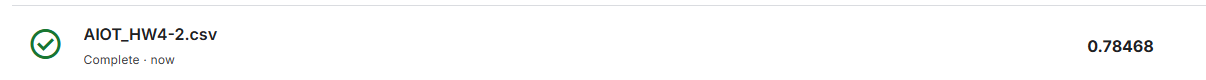